# Summary Investment Strategy

## AlphaGen S.A.R.L. - S

* Filippo Ippolito - Universitat Pompeu Fabra and Barcelona School of Economics
* Roberto Steri    - University of Luxemburg
* Juan F. Imbet    - Université Paris Dauphine-PSL

## Description

- We exploit the short-term predictive ability of accounting, market, and macroeconomic information to form a more precise estimator of expected returns of US Public firms.
- We build a long short portfolio of 50 stocks that maximizes expected returns given constraints on market neutrality, and sector exposure.  

C:\Users\Juan\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


Start date,2014-01-02
End date,2021-09-30
Total months,134
,Backtest
Annual return,14.137%
Cumulative returns,341.259%
Annual volatility,5.331%
Sharpe ratio,2.51
Calmar ratio,0.37
Stability,0.88
Max drawdown,-38.091%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.09,2018-07-15,2020-03-15,2020-11-22,615
1,16.46,2021-02-14,2021-05-16,2021-09-04,145
2,11.05,2015-10-18,2016-02-14,2016-03-16,108
3,8.35,2017-07-02,2017-08-27,2017-10-20,80
4,4.75,2018-01-28,2018-02-18,2018-05-06,70


Stress Events,mean,min,max
Apr14,0.06%,-0.08%,0.19%
Oct14,-0.00%,-0.18%,0.14%
Fall2015,-0.06%,-0.33%,0.27%
New Normal,0.05%,-1.78%,1.63%


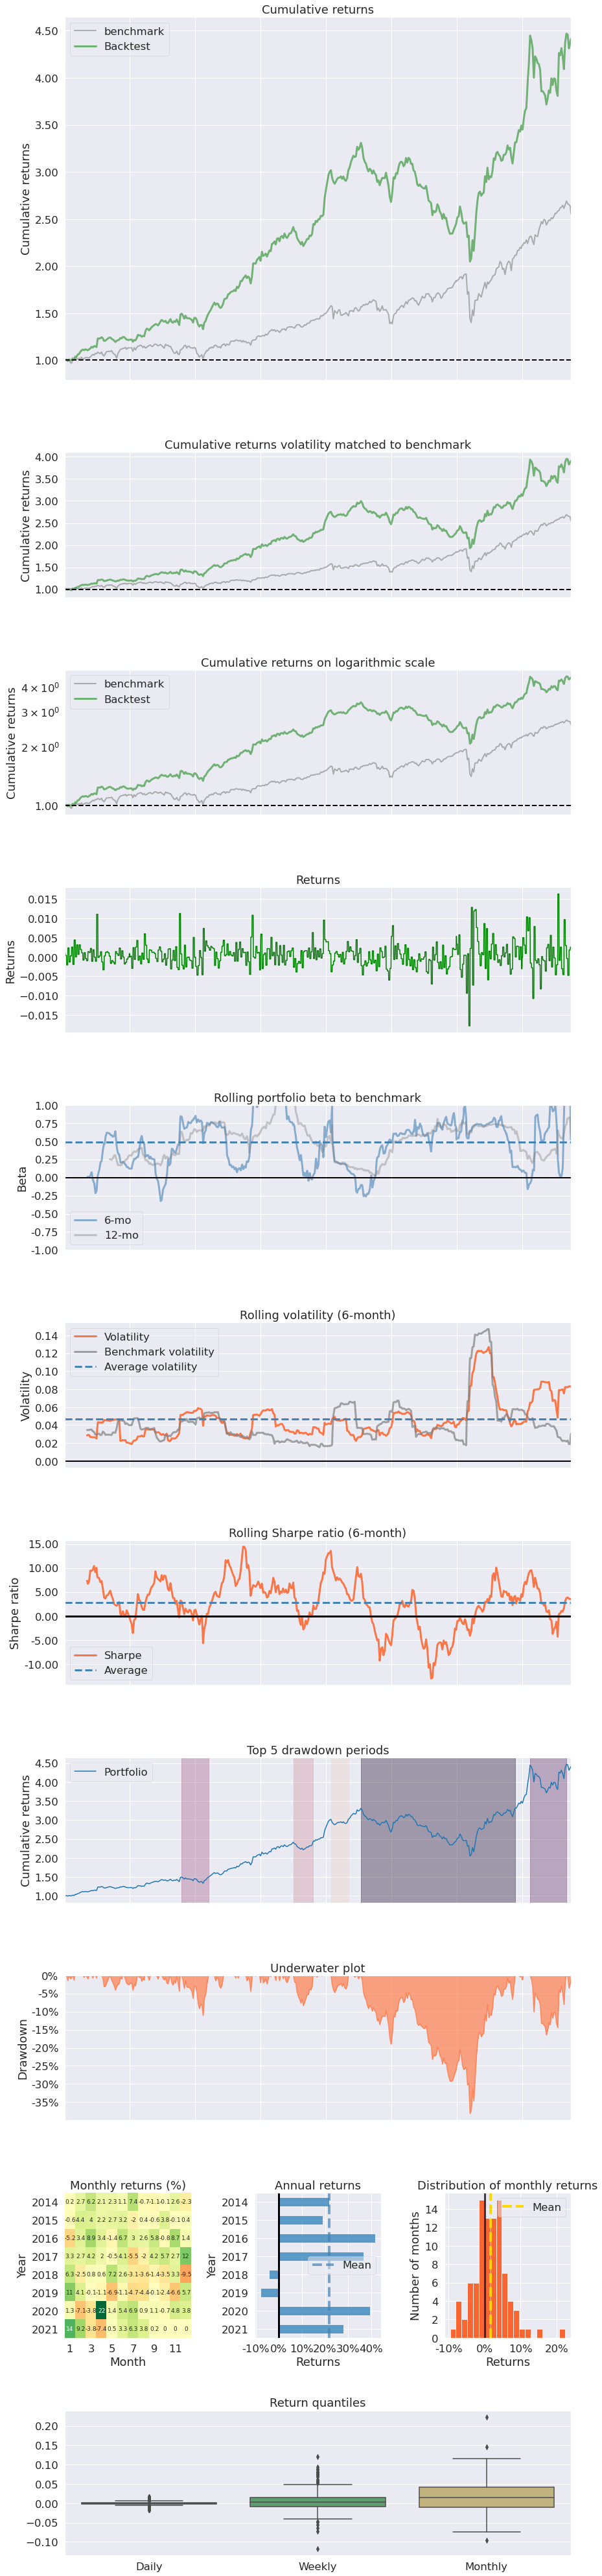

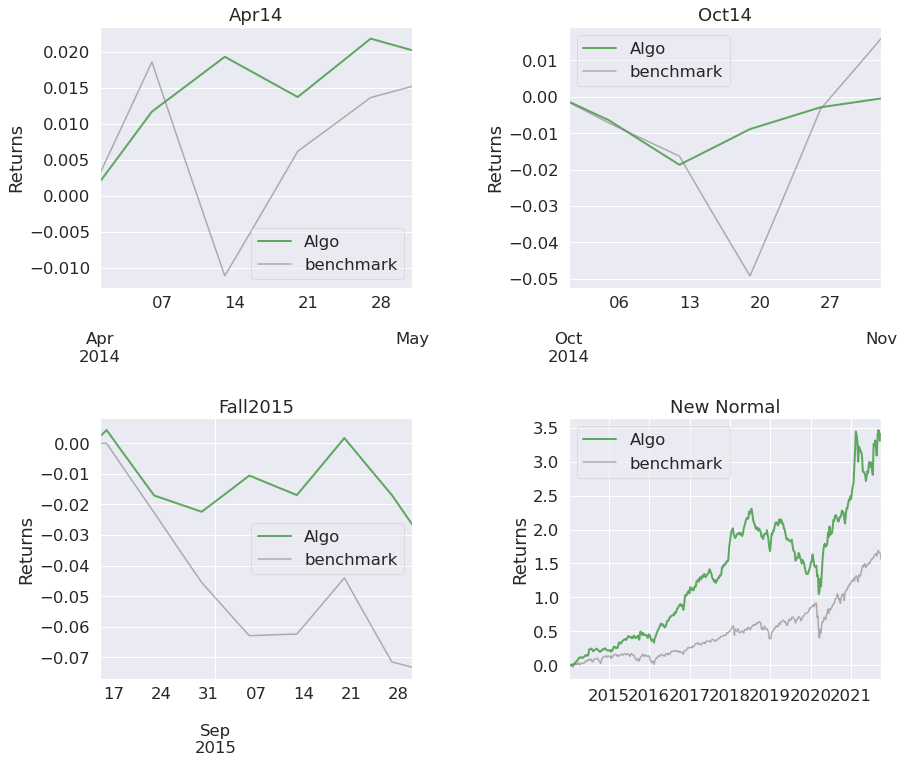

In [1]:
#%%
import pandas as pd
import numpy as np
import pyfolio as pf
from datetime import datetime
# %%
df = pd.read_csv("../LS35-15SP-p2-S1-l95-xb.csv")
df.date = df.date.apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

# Fill the gaps with the equivalent return
r = pd.date_range(start=df.date.min(), end=df.date.max())
df = df.set_index('date').reindex(r).fillna(0.0).rename_axis('date').reset_index()
df.head()

# %%
df['week'] = df.date.apply(lambda x : f"{x.year} {x.isocalendar()[1]}")

df = df.join(df.groupby('week')['ret_portfolio'].mean(), on='week', rsuffix='_avg')
df = df.join(df.groupby('week')['ret_spy'].mean(), on='week', rsuffix='_avg')

df = df.rename(columns = {'ret_portfolio_avg' : 'ret', 
                          'ret_spy_avg' : 'benchmark'} )
# %%
df = df.set_index('date')



pf.create_full_tear_sheet(df.ret,benchmark_rets=df.benchmark)
